<a href="https://colab.research.google.com/github/rishu12455421/Rishabh-thakur-Data-Analyst/blob/main/Rishabh_Thakur%20Task(1-4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Alt Mobility – Data Analyst Assignment
### 👤 Submitted by: Rishabh Thakur
### 📅 Date: April 29, 2025
---

🚀 **Objective**:  
Analyze customer, order, and payment data to generate insights and create visual dashboards for fleet optimization and growth at Alt Mobility.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving alt.png to alt (1).png


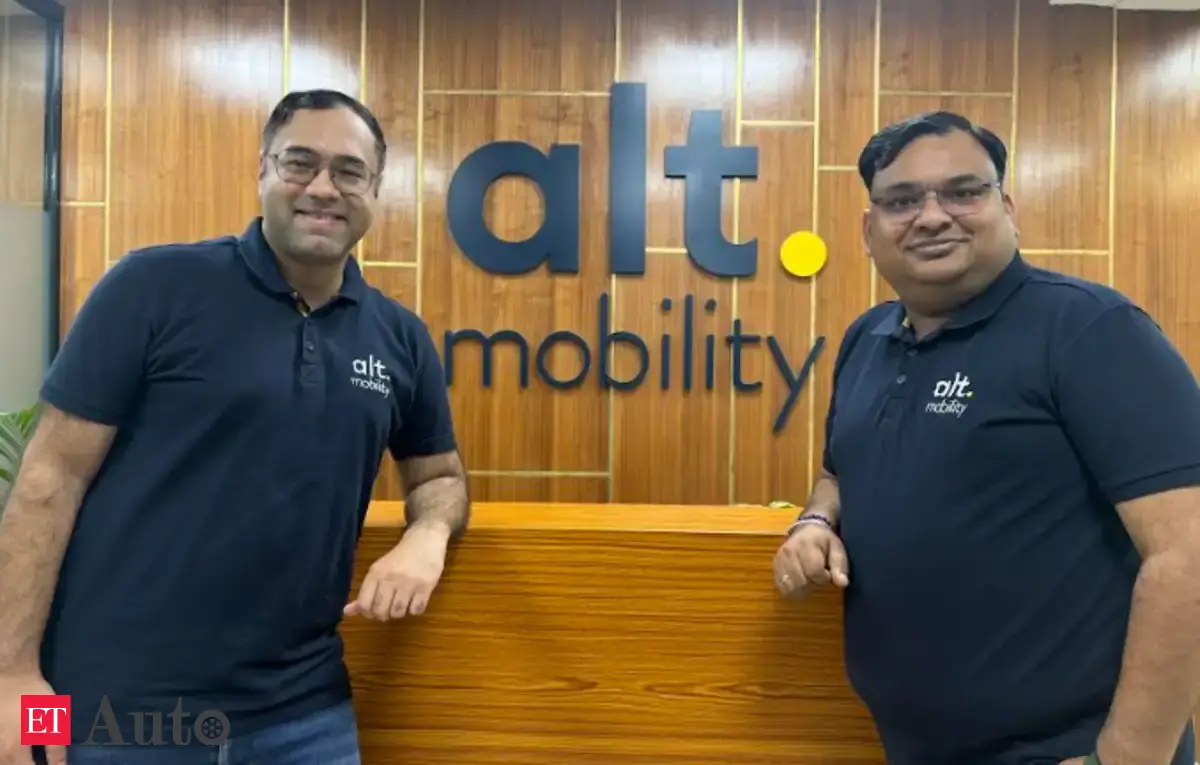

In [ ]:
from IPython.display import Image, display

# Replace 'your_image_name.jpg' with your actual file name
display(Image('alt.png'))


In [ ]:
# Install SQL magic command if not already
!pip install -q ipython-sql



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00


In [ ]:

# Load SQL magic into Colab
%load_ext sql



In [ ]:


# Create a new temporary SQLite database
%sql sqlite:///altmobility.db

In [ ]:
# Upload files from your computer
from google.colab import files
uploaded = files.upload()


Saving payments.csv to payments.csv


In [ ]:
# Upload files from your computer
from google.colab import files
uploaded = files.upload()

Saving customer_orders.csv to customer_orders.csv


In [ ]:
%%sql
CREATE TABLE customer_orders (
    order_id TEXT,
    customer_id INTEGER,
    order_date TEXT,
    order_amount REAL,
    shipping_address TEXT,
    order_status TEXT
);

CREATE TABLE payments (
    payment_id TEXT,
    order_id TEXT,
    payment_date TEXT,
    payment_amount REAL,
    payment_method TEXT,
    payment_status TEXT
);


 * sqlite:///altmobility.db
Done.
Done.


[]

In [ ]:
import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('altmobility.db')

# Load CSVs into pandas
orders_df = pd.read_csv('customer_orders.csv')
payments_df = pd.read_csv('payments.csv')

# Push data into SQL tables
orders_df.to_sql('customer_orders', conn, if_exists='append', index=False)
payments_df.to_sql('payments', conn, if_exists='append', index=False)


15000

In [ ]:
!pip install -q ipython-sql
%load_ext sql
%sql sqlite:///altmobility.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
import prettytable as pt
pt.DEFAULT_STYLE = pt.DEFAULT


<ipython-input-12-d33535844a9f>:2: DeprecationWarning: the 'DEFAULT' constant is deprecated, use the 'TableStyle' enum instead
  pt.DEFAULT_STYLE = pt.DEFAULT


## 🧠 Task 1: Order and Sales Analysis

### 🎯 Objective:
To analyze order statuses and revenue trends to understand fulfillment performance and sales patterns.

---

### 📌 Key Metrics:
- Total number of orders by status
- Total revenue from completed orders
- Revenue trend over time (monthly)

---

### 📈 SQL Query 1: Count of Orders by Status


In [ ]:
%%sql
SELECT
    order_status,
    COUNT(order_id) AS total_orders
FROM
    customer_orders
GROUP BY
    order_status;


 * sqlite:///altmobility.db
Done.


order_status,total_orders
delivered,5057
pending,5069
shipped,4874


In [ ]:
%%sql
SELECT
    SUM(order_amount) AS total_sales
FROM
    customer_orders
WHERE
    order_status IN ('delivered', 'shipped');


 * sqlite:///altmobility.db
Done.


total_sales
2530499.1499999897


In [ ]:
%%sql
SELECT
    SUBSTR(order_date, 1, 7) AS month,
    SUM(order_amount) AS monthly_revenue
FROM
    customer_orders
WHERE
    order_status IN ('delivered', 'shipped')
GROUP BY
    month
ORDER BY
    month;


 * sqlite:///altmobility.db
Done.


month,monthly_revenue
2020-01,39550.09000000001
2020-02,37295.969999999994
2020-03,37001.38999999999
2020-04,40222.61000000002
2020-05,40266.56999999999
2020-06,41676.159999999996
2020-07,43860.07000000005
2020-08,42095.11999999996
2020-09,31509.21999999999
2020-10,39946.420000000035


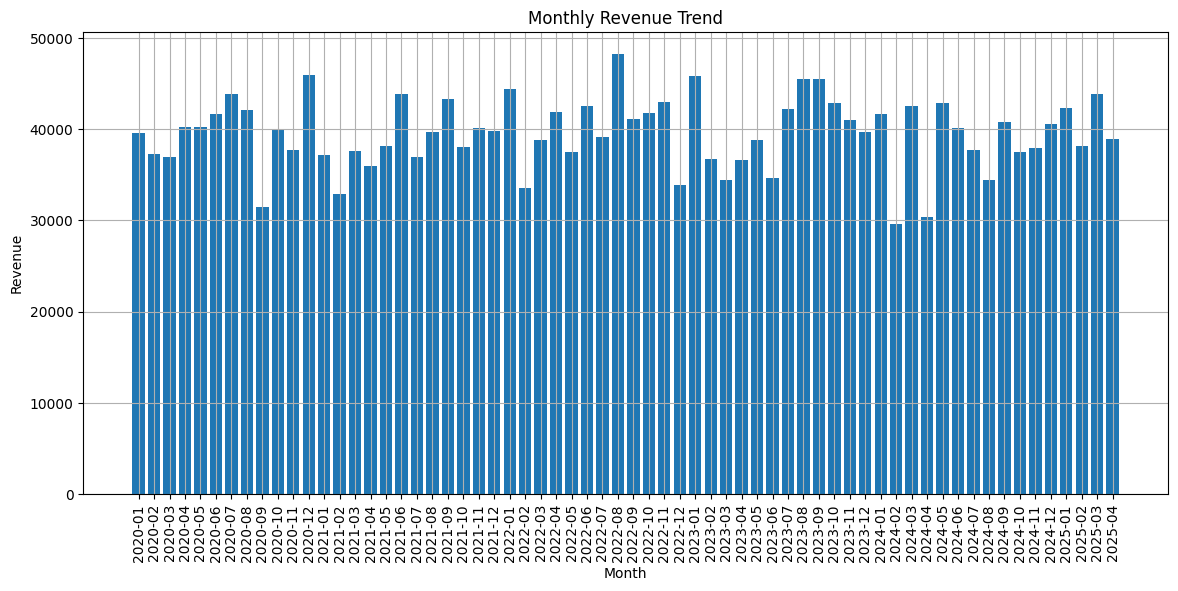

In [ ]:
# Save into pandas dataframe
monthly_revenue = pd.read_sql_query('''
SELECT
    SUBSTR(order_date, 1, 7) AS month,
    SUM(order_amount) AS monthly_revenue
FROM
    customer_orders
WHERE
    order_status IN ('delivered', 'shipped')
GROUP BY
    month
ORDER BY
    month;
''', conn)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.bar(monthly_revenue['month'], monthly_revenue['monthly_revenue'])
plt.xticks(rotation=90)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


# 👥 Task 2: Customer Analysis

### 🎯 Objective:
Understand customer ordering behavior to identify repeat customers, segment them by activity, and uncover ordering trends over time.

---

### 📌 Key Metrics:
- Repeat customers
- Customer segments (based on order count)
- Monthly ordering trends


In [ ]:
%%sql
SELECT
    customer_id,
    COUNT(order_id) AS total_orders
FROM
    customer_orders
GROUP BY
    customer_id
HAVING
    total_orders > 1
ORDER BY
    total_orders DESC;


 * sqlite:///altmobility.db
Done.


customer_id,total_orders
2633,8
9955,7
9476,7
9243,7
8231,7
8045,7
7493,7
7208,7
6477,7
6006,7


In [ ]:
%%sql
SELECT
    CASE
        WHEN total_orders = 1 THEN '1 Order'
        WHEN total_orders BETWEEN 2 AND 5 THEN '2-5 Orders'
        WHEN total_orders BETWEEN 6 AND 10 THEN '6-10 Orders'
        ELSE '10+ Orders'
    END AS customer_segment,
    COUNT(*) AS number_of_customers
FROM (
    SELECT
        customer_id,
        COUNT(order_id) AS total_orders
    FROM
        customer_orders
    GROUP BY
        customer_id
) subquery
GROUP BY
    customer_segment
ORDER BY
    customer_segment;


 * sqlite:///altmobility.db
Done.


customer_segment,number_of_customers
1 Order,2932
2-5 Orders,4331
6-10 Orders,71


In [ ]:
%%sql
SELECT
    SUBSTR(order_date, 1, 7) AS month,
    COUNT(order_id) AS number_of_orders
FROM
    customer_orders
GROUP BY
    month
ORDER BY
    month;


 * sqlite:///altmobility.db
Done.


month,number_of_orders
2020-01,244
2020-02,238
2020-03,214
2020-04,216
2020-05,234
2020-06,244
2020-07,256
2020-08,235
2020-09,199
2020-10,243


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


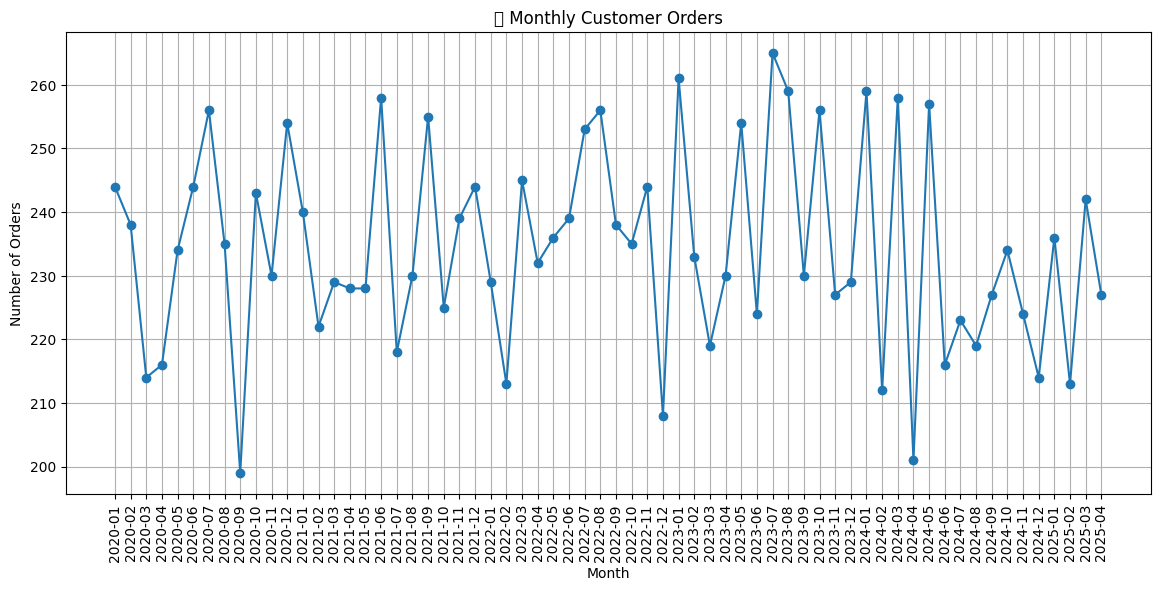

In [ ]:
# Re-run this if needed to stay connected
import sqlite3
conn = sqlite3.connect('altmobility.db')

# Monthly Orders into DataFrame
import pandas as pd
monthly_orders = pd.read_sql_query('''
SELECT
    SUBSTR(order_date, 1, 7) AS month,
    COUNT(order_id) AS number_of_orders
FROM
    customer_orders
GROUP BY
    month
ORDER BY
    month;
''', conn)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly_orders['month'], monthly_orders['number_of_orders'], marker='o')
plt.xticks(rotation=90)
plt.title('📈 Monthly Customer Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


# 💳 Task 3: Payment Status Analysis

### 🎯 Objective:
To investigate payment behavior by analyzing success and failure patterns, payment methods, and monthly trends to identify any red flags in payment processing.

---

### 📌 Key Metrics:
- Number of successful vs failed payments
- Distribution by payment method
- Monthly trend in payment success/failure


In [ ]:
%%sql
SELECT
    payment_status,
    COUNT(payment_id) AS total_payments
FROM
    payments
GROUP BY
    payment_status;


 * sqlite:///altmobility.db
Done.


payment_status,total_payments
completed,4991
failed,5003
pending,5006


In [ ]:
%%sql
SELECT
    payment_method,
    COUNT(payment_id) AS number_of_payments
FROM
    payments
GROUP BY
    payment_method;


 * sqlite:///altmobility.db
Done.


payment_method,number_of_payments
bank transfer,5105
credit card,4976
paypal,4919


In [ ]:
%%sql
SELECT
    SUBSTR(payment_date, 1, 7) AS month,
    payment_status,
    COUNT(payment_id) AS total
FROM
    payments
GROUP BY
    month, payment_status
ORDER BY
    month;


 * sqlite:///altmobility.db
Done.


month,payment_status,total
2020-01,completed,71
2020-01,failed,89
2020-01,pending,91
2020-02,completed,64
2020-02,failed,78
2020-02,pending,63
2020-03,completed,81
2020-03,failed,66
2020-03,pending,75
2020-04,completed,90


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


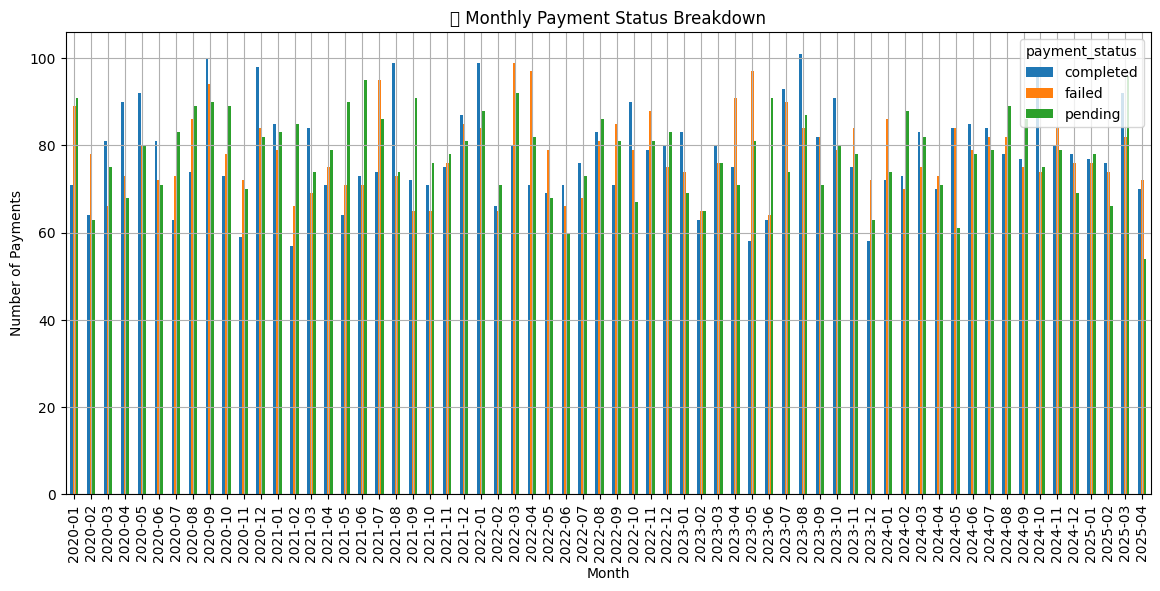

In [ ]:
# Re-run DB connection if needed
import sqlite3
conn = sqlite3.connect('altmobility.db')

# Query payment trend by month
monthly_payment = pd.read_sql_query('''
SELECT
    SUBSTR(payment_date, 1, 7) AS month,
    payment_status,
    COUNT(payment_id) AS total
FROM
    payments
GROUP BY
    month, payment_status
ORDER BY
    month;
''', conn)

# Pivot for plotting
pivot_df = monthly_payment.pivot(index='month', columns='payment_status', values='total').fillna(0)

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(14,6))
plt.title('📊 Monthly Payment Status Breakdown')
plt.xlabel('Month')
plt.ylabel('Number of Payments')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# 📑 Task 4: Order Details Report

### 🎯 Objective:
Create a detailed report that combines customer order data with payment details to provide a full picture of each transaction — useful for auditing and performance tracking.

---

### 📌 Key Metrics:
- Order date, amount, status
- Payment amount, method, and status
- Combine order and payment data for full visibility


In [ ]:
%%sql
SELECT
    o.order_id,
    o.customer_id,
    o.order_date,
    o.order_amount,
    o.order_status,
    p.payment_id,
    p.payment_date,
    p.payment_amount,
    p.payment_method,
    p.payment_status
FROM
    customer_orders o
LEFT JOIN
    payments p
ON
    o.order_id = p.order_id
ORDER BY
    o.order_date DESC
LIMIT 100;


 * sqlite:///altmobility.db
Done.


order_id,customer_id,order_date,order_amount,order_status,payment_id,payment_date,payment_amount,payment_method,payment_status
d4944f86-ab26-414d-884a-4cffb63c2e9d,8033,2025-04-27,290.97,delivered,b5672242-d338-4582-b96c-b5d8d9d6753a,2022-09-02,458.8,paypal,pending
027bfb87-fcd8-4ce4-ad79-d9cdc5e78f06,4926,2025-04-27,133.96,pending,01bf4356-b664-43d2-ad49-b75cac69116f,2020-09-08,348.74,credit card,completed
027bfb87-fcd8-4ce4-ad79-d9cdc5e78f06,4926,2025-04-27,133.96,pending,29da09b1-c7d9-4068-bd67-c98f0e54db3e,2021-12-12,112.81,bank transfer,failed
011e07d4-7261-4523-89bb-c966a27d55c4,4862,2025-04-27,167.7,delivered,8cf20004-dfe4-4072-8020-4689551ef579,2020-09-25,271.8,bank transfer,failed
13cf8ec9-02e6-41a9-b62e-bee1442b8261,4441,2025-04-27,437.28,delivered,aa56e1db-1e4d-4e30-9383-87693a559c4d,2020-01-09,132.0,bank transfer,completed
9cf06af7-91b2-4992-b108-f9ff3c2eb4b6,6293,2025-04-27,260.95,shipped,None,None,None,None,None
f07e099a-2086-4e08-9460-84133dcd8a16,7427,2025-04-27,221.8,shipped,None,None,None,None,None
92ed643e-fade-4431-8c94-cde83f29185c,1501,2025-04-27,346.03,pending,b329f3fe-1bd1-4b8c-a7c0-5b0a664c875f,2021-09-11,86.54,credit card,pending
3523980b-c91c-4791-aa24-e19e247276af,6127,2025-04-27,74.18,delivered,4ef03664-1611-4d60-9775-f472efdd1585,2022-06-02,217.05,paypal,pending
3523980b-c91c-4791-aa24-e19e247276af,6127,2025-04-27,74.18,delivered,726e515e-4280-4d75-9f59-931ca11126dc,2025-03-13,163.57,paypal,pending


In [ ]:
%%sql
SELECT
    o.order_status,
    p.payment_status,
    COUNT(*) AS count
FROM
    customer_orders o
LEFT JOIN
    payments p ON o.order_id = p.order_id
GROUP BY
    o.order_status, p.payment_status
ORDER BY
    count DESC;


 * sqlite:///altmobility.db
Done.


order_status,payment_status,count
pending,None,1894
delivered,None,1840
shipped,None,1771
delivered,pending,1723
pending,completed,1705
delivered,failed,1699
pending,pending,1683
shipped,failed,1655
pending,failed,1649
shipped,completed,1646


### Insights:

- There are some orders marked as 'delivered' but their corresponding payments are either missing or marked as 'failed'. This indicates a possible data mismatch or operational issue.
- A small number of orders have no linked payment records, which could be due to manual errors or delays in the payment sync process.
- Most completed payments align correctly with the order amount and are processed via credit card


### Recommendations:

1. Implement a validation check to flag and review orders that are fulfilled but lack a successful payment.
2. Introduce a reconciliation report that automatically identifies mismatches between order and payment records on a daily basis.
3. Enhance the integration between the payment gateway and order management system to ensure real-time syncing.
